![img](../img/g163.png)

This notebook will show with examples the step-by-step usage of XERUS.
We will start with the simple case of a mixture of Cr and Zn and later on we show the whole
analysis as described in the paper.
```
Pedro Baptista de Castro, Kensei Terashima, Miren Garbiñe Esparza Echevarría, Hiroyuki Takeya, Yoshihiko Takano (2021). "XERUS: An open-source tool for quick XRD phase identification and refinement automation" arXiv:2112.04773, https://arxiv.org/abs/2112.04773
```

Before running this notebook, pleas ensure that:
* The API-key for materials project has been set at.
* The local mongoDB server has been started, or if you are not planning to use a local server, that the information has been set
* That after ensuring the above is correct, there are no failed tests (after running pytest in the tests folder). 

# Preloads

In [1]:
# Add XERUS to current path.
import sys, os
from pathlib import Path
currdir = Path(os.getcwd())
sys.path.append(os.path.join(currdir.parent.as_posix()))
%matplotlib inline 
from Xerus import XRay
from Xerus.utils.tools import create_folder
create_folder("results")

GSAS-II binary directory: /home/pedrobcst/Dropbox/PycharmProjects/Xerus/xerus_public_ALPHA/Xerus/GSASII/bindist
7 values read from config file /home/pedrobcst/Dropbox/PycharmProjects/Xerus/xerus_public_ALPHA/Xerus/GSASII/config.py


## Toy Example: Cr and Zn

Here we will start with a simple mixture of Cr and Zn.
We start by first initializing an XRay object with the datapath, elements to consider, and folder to save.

### Set up search space and data

Sucessfuly connected to the database
Standarizing intensity to [0,1]..
Exported new datafile at results/CrZn/Cr-Zn_preprocessed.csv
Removing background using polynomial degree: 8


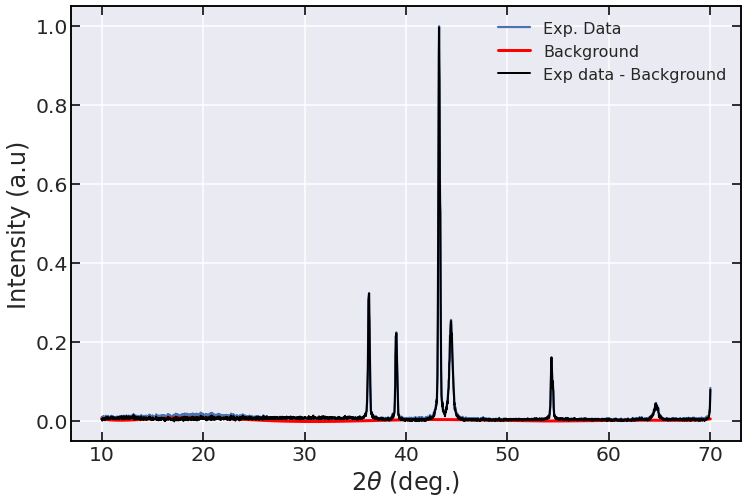

In [12]:
mixture = XRay(name='CrZn', # name of the data
               working_folder = 'results/CrZn/', # place to save the results
               elements = ['Cr', 'Zn'], # List of elements to consdier to search
               exp_data_file = 'data/Cr-Zn.ras', # Path to experimental data
               data_fmt = 'ras', # Data format
               maxsys = 2, # Optional: Use this option if you want to search the search space to up to binary, ternary etc
               max_oxy = 2, # Optional: Use tihs option if you want to limit search space for oxide combinations.
               remove_background = True, # Optional: Use this option if you want to preprocess to remove the background. It will be done by fitting a poloyionmal funcion of degree poly_degree
               poly_degree = 8, # Optional: The degree of the polynomial to use for removing background
               standarize_int = True, # Optional: Use this to scale the data before searching.
               use_preprocessed = True, # Optional: If this is set to true, ti will use the pre processed data for phase search.
              )

After it has intiliazied, to start the phase search, we will simple use
```python
mixture.analyze(**params)
```

### Begin analysis

In [13]:
mixture.analyze(n_runs = "auto", # Set the number of runs to search. If set to auto will use the threshold drop as limit
                grabtop = 3, # The number of patterns to consider at each run
                delta = 1.3, # Box width for the patternl removal
                combine_filter = False, # Optional: Will be removed later on.
                select_cifs = True, # Optional: This is to allow XERUS to filter cifs or not. Should be always True
                plot_all = False, # Optional: If true, will also automatically plot all refinement results.
                ignore_provider = None, # Optional. Can be used to ignore a certain structure provider.
                ignore_comb = None, # Optional: Can be used to ignroe a given combinaiton, ie: "B-O",
                ignore_ids = None, # Optional: Can be used to ignore a certian CIF id
                solver = "box", # Solver to use. Currently defaults to 'box'. Other solvers are in test..
                group_method = "system_type", # How to group the strucctures. Now is by system-type, stoichometry also possible
                auto_threshold = 10, # Threshold to stop iteration with auto
                r_ori = False, # This can be used to try refine prefered orietnation. Not recommeneded (unstable)
                n_jobs = -1, # How much cpus to use
               )

Using preprocessed data results/CrZn/Cr-Zn_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Cr
Checking the following combination:Zn
Checking the following combination:Zn-Cr
Cr
Zn
Zn-Cr
Modified Query for given 2 to : ['Cr', 'Zn', 'Zn-Cr']
Simulating 80 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is Zn, with Cij: 0.9291739854385674
Cr-Zn_Top30.html
Sucessfuly read datafile results/CrZn/Cr-Zn_preprocessed.csv
Refining 3 highest correlated patterns and determining main phase (n=0)...
Phase detected Zn_COD_9008522.cif with rwp 42.60499805099578
Removing 0 patterns that maximum intensity dropped below 10%.
Phase detected Cr_COD_9008531.cif
Removing 0 patterns that maximum intensity dropped below 10%.
Intensity lower than 10%. Finishing run
Number total of possible phases is 2
results/CrZn/CrZnAll_N_Runs.html
0
260
0
260
Removed 1 repeated combinations.
Phase: Zn-P6_3-mmc_Cr-Im-3m, Rwp: 28.615933124886737
P

provider                  id      name  \
0  [COD, COD]  [9008522, 9008531]  [Zn, Cr]   
1  [COD, COD]  [9008522, 9008493]  [Zn, Cr]   
2   [COD, MP]    [9008522, mp-17]  [Zn, Cr]   
3  [COD, COD]  [9008522, 9012613]  [Zn, Cr]   
4         COD             9008522        Zn   
5         COD             9008531        Cr   
6         COD             9008493        Cr   

                                   filename            spacegroup  \
0  [Zn_COD_9008522.cif, Cr_COD_9008531.cif]     [P6_3/mmc, Im-3m]   
1  [Zn_COD_9008522.cif, Cr_COD_9008493.cif]  [P6_3/mmc, P6_3/mmc]   
2     [Zn_COD_9008522.cif, Cr_MP_mp-17.cif]     [P6_3/mmc, Pm-3n]   
3  [Zn_COD_9008522.cif, Cr_COD_9012613.cif]      [P6_3/mmc, Pm-3]   
4                        Zn_COD_9008522.cif              P6_3/mmc   
5                        Cr_COD_9008531.cif                 Im-3m   
6                        Cr_COD_9008493.cif              P6_3/mmc   

  spacegroup_number          crystal_system system_type  \
0        [194, 229]      [hexagonal, cubic]    [Zn, Cr]   
1        [194, 194]  [hexagonal, hexagonal]    [Zn, Cr]   
2        [194, 223]      [hexagonal, cubic]    [Zn, Cr]   
3        [194, 200]      [hexagonal, cubic]    [Zn, Cr]   
4               194               hexagonal          Zn   
5               229                   cubic          Cr   
6               194               hexagonal          Cr   

                                           full_path        rwp  \
0  [results/CrZn/cifs/Zn_COD_9008522.cif, results...  28.615933   
1  [results/CrZn/cifs/Zn_COD_9008522.cif, results...  41.818579   
2  [results/CrZn/cifs/Zn_COD_9008522.cif, results...  42.405936   
3  [results/CrZn/cifs/Zn_COD_9008522.cif, results...  42.465015   
4               results/CrZn/cifs/Zn_COD_9008522.cif  42.604998   
5               results/CrZn/cifs/Cr_COD_9008531.cif  67.657199   
6               results/CrZn/cifs/Cr_COD_9008493.cif  76.663921   

                   wt  nruns     pos  \
0  [0.76108, 0.23892]      2  [1, 1]   
1  [0.97193, 0.02807]      2  [1, 1]   
2  [0.98953, 0.01047]      2  [1, 2]   
3  [0.99149, 0.00851]      2  [1, 2]   
4                 100      1       1   
5                 100      1       1   
6                 100      1       1   

                                            gpx_path  
0  results/CrZn/gsas2_files/Zn-P6_3-mmc_Cr-Im-3m.gpx  
1  results/CrZn/gsas2_files/Zn-P6_3-mmc_Cr-P6_3-m...  
2  results/CrZn/gsas2_files/Zn-P6_3-mmc_Cr-Pm-3n.gpx  
3   results/CrZn/gsas2_files/Zn-P6_3-mmc_Cr-Pm-3.gpx  
4           results/CrZn/gsas2_files/Zn-P6_3-mmc.gpx  
5              results/CrZn/gsas2_files/Cr-Im-3m.gpx  
6           results/CrZn/gsas2_files/Cr-P6_3-mmc.gpx

### Visualizing results

Now that the analysis has finished, we can inspect the final results. \
For convinience they are are shown in a pandas dataframe where they are sorted by $R_{wp}$. \
It is possible then to easily visualize by using the **index** of the dataframe, in the following manner:
```python
mixture.plot_result(index, engine=engine)
```
Where engine is either "plotly" (for interactive viz.) or "matplotlib" for static plots


/home/nfm/bench/Xerus/Examples/Zn-P6_3-mmc_Cr-Im-3m.csv
PWDR Cr-Zn_preprocessed.csv reflections written to file /home/nfm/bench/Xerus/Examples/Zn-P6_3-mmc_Cr-Im-3m.csv


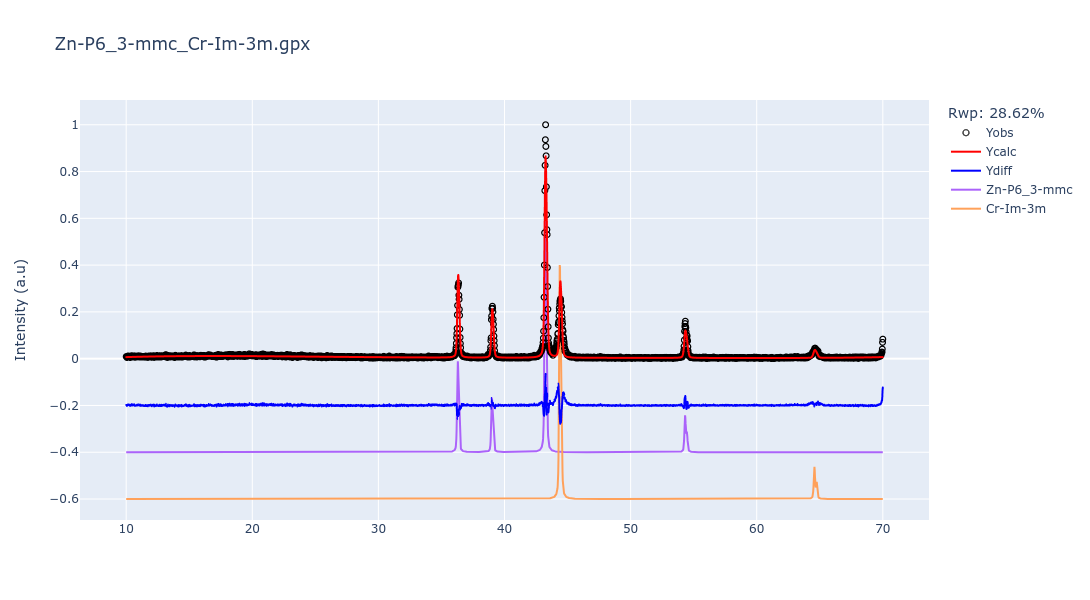

In [14]:
mixture.plot_result(0, engine="plotly")

### Optimization and Export

XERUS provides if desired, a automatic refinement tool. It can be directly started from the search results,
similar to plotting.

/home/nfm/bench/Xerus/Examples/data/Cr-Zn.ras read by Reader Rigaku .ras file
Instrument parameters read: /home/nfm/bench/Xerus/Xerus/inc/RigakuSi.instprm (G2 fmt) bank None
/home/nfm/bench/Xerus/Examples/results/CrZn/cifs/Zn_COD_9008522.cif read by Reader CIF
gpx file saved as /home/nfm/bench/Xerus/Examples/results/CrZn/Cr-Zn.gpx
/home/nfm/bench/Xerus/Examples/results/CrZn/cifs/Cr_COD_9008531.cif read by Reader CIF
gpx file saved as /home/nfm/bench/Xerus/Examples/results/CrZn/Cr-Zn.gpx
/home/nfm/bench/Xerus/Examples/Zn-P6_3_mmc_Cr-Im-3m.csv
PWDR Cr-Zn.ras sample 1 reflections written to file /home/nfm/bench/Xerus/Examples/Zn-P6_3_mmc_Cr-Im-3m.csv
Cr-Im-3m
Zn-P6_3_mmc


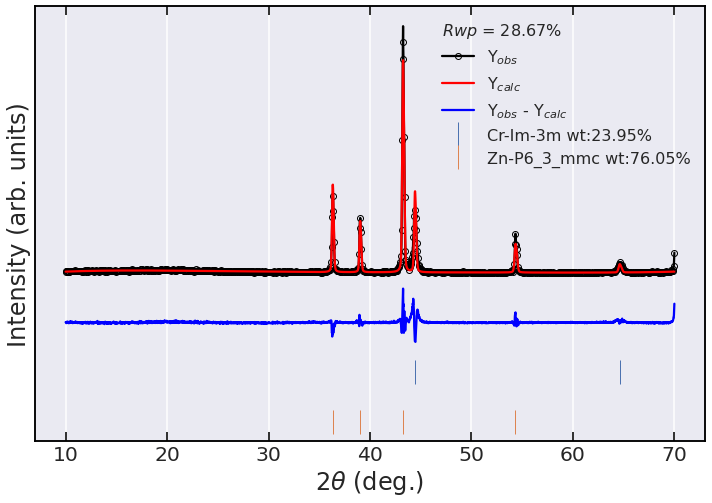

In [15]:
# Starts optimizer object
mixture.initialize_optimizer(0)

More than one phase found. Running optimizer for more than one phase
Trial: 41 - Rwp: 62.641
 Current best Rwp: 62.641 in trial number: 41

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
Trial: 36 - Rwp: 100.000
 Current best Rwp: 62.641 in trial number: 41
Trial: 8 - Rwp: 57.538
 Current best Rwp: 57.538 in trial number: 8
Trial: 47 - Rwp: 62.394
 Current best Rwp: 57.538 in trial number: 8
Trial: 40 - Rwp: 100.000
 Current best Rwp: 57.538 in trial number: 8
Trial: 7 - Rwp: 1000000000.000
 Current best Rwp: 57.538 in trial numbe

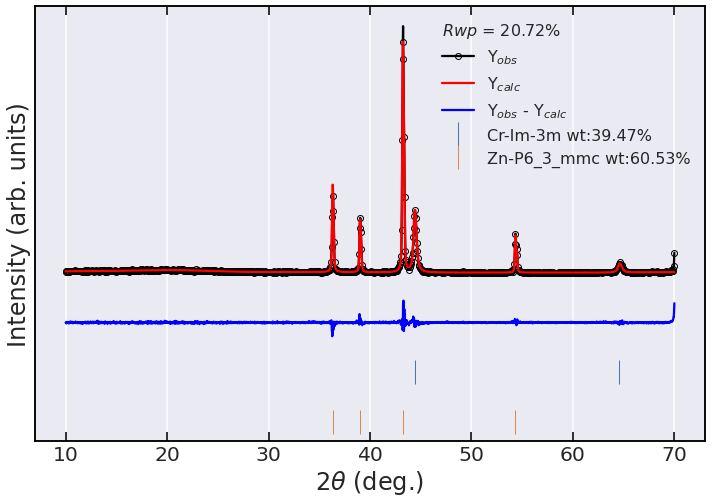

In [17]:
mixture.run_optimizer(n_trials = 200, # How many runs to try
                      n_startup = 20, # How many trials to start the search with
                      allow_pref_orient = True, # To allow pref orietnation to be refined
                      allow_atomic_params = True, # Allows atomic paramaters (X, U) to be considered
                      allow_broad = True, # Allow broadenign terms (Check GSAS II doc.) (test)
                      allow_strain = True, # Allow strain terms (test)
                      allow_angle = True, # To allow acute angle refinement first.
                      force_ori = False, # To always consider pref. orientation
                      verbose = 'silent', # Verbose
                      param = 'rwp', # Objetive goal
                      n_jobs = -1, # Number of cores to use
                      plot_best = True, # plot best result after opt.
                      show_lattice = True, # Prints obtained lattice parameters
                      random_state = 71, # Random state
                     )

### Exporting the optimized results

The optimal results can then be exported by simply:
```python
mixture.export_results()
```

In [18]:
mixture.export_results()

/home/nfm/bench/Xerus/Examples/Cr-Zn.csv
PWDR Cr-Zn.ras sample 1 reflections written to file /home/nfm/bench/Xerus/Examples/Cr-Zn.csv


# Paper Experimental Results

## Ni-Cr mixture

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from Xerus import XRay

In [14]:
nicr = XRay(name="NiCr",
            elements=["Ni","Cr"],
            working_folder="results/NiCr",
           exp_data_file="data/Cr-Ni.ras")

No datafmt passed. Assuming its ras
Standarizing intensity to [0,1]..
Exported new datafile at results/NiCr/Cr-Ni_preprocessed.csv


In [15]:
nicr.analyze(n_runs=2, grabtop=3, delta=1.3)

Using preprocessed data results/NiCr/Cr-Ni_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Ni
Checking the following combination:Cr
Checking the following combination:Cr-Ni
Ni
Cr
Cr-Ni
Modified Query for given 2 to : ['Ni', 'Cr', 'Cr-Ni']
Simulating 115 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is Ni, with Cij: 0.8943600753135232
Cr-Ni_Top30.html
Sucessfuly read datafile results/NiCr/Cr-Ni_preprocessed.csv
Refining 3 highest correlated patterns and determining main phase (n=0)...
Phase detected Ni_COD_2100646.cif with rwp 36.3990159507033
Removing 1 patterns that maximum intensity dropped below 10%.
Phase detected Cr_MP_mp-90.cif
results/NiCr/NiCrAll_N_Runs.html
0
130
0
130
Removed 2 repeated combinations.
Phase: Ni-Fm-3m_Cr-Im-3m, Rwp: 25.317013862019376
Phase: Ni-Fm-3m_Cr-P6_3-mmc, Rwp: 35.7411717639077
Phase: Ni-Fm-3m_Cr1.6Ni0.4-Im-3m, Rwp: 25.1492317630201
Analysis complete
Best combination: Ni_

provider                  id              name  \
0  [COD, COD]  [2100646, 1525376]  [Ni, Cr1.6Ni0.4]   
1   [COD, MP]    [2100646, mp-90]          [Ni, Cr]   
2  [COD, COD]  [2100646, 9011574]          [Ni, Cr]   
3         COD             2100646                Ni   
4          MP               mp-90                Cr   
5         COD             1525376        Cr1.6Ni0.4   

                                           filename         spacegroup  \
0  [Ni_COD_2100646.cif, Cr1.6Ni0.4_COD_1525376.cif]     [Fm-3m, Im-3m]   
1             [Ni_COD_2100646.cif, Cr_MP_mp-90.cif]     [Fm-3m, Im-3m]   
2          [Ni_COD_2100646.cif, Cr_COD_9011574.cif]  [Fm-3m, P6_3/mmc]   
3                                Ni_COD_2100646.cif              Fm-3m   
4                                   Cr_MP_mp-90.cif              Im-3m   
5                        Cr1.6Ni0.4_COD_1525376.cif              Im-3m   

  spacegroup_number      crystal_system  system_type  \
0        [225, 229]      [cubic, cubic]  [Ni, Cr-Ni]   
1        [225, 229]      [cubic, cubic]     [Ni, Cr]   
2        [225, 194]  [cubic, hexagonal]     [Ni, Cr]   
3               225               cubic           Ni   
4               229               cubic           Cr   
5               229               cubic        Cr-Ni   

                                           full_path        rwp  \
0  [results/NiCr/cifs/Ni_COD_2100646.cif, results...  25.149232   
1  [results/NiCr/cifs/Ni_COD_2100646.cif, results...  25.317014   
2  [results/NiCr/cifs/Ni_COD_2100646.cif, results...  35.741172   
3               results/NiCr/cifs/Ni_COD_2100646.cif  36.399016   
4                  results/NiCr/cifs/Cr_MP_mp-90.cif  37.293971   
5       results/NiCr/cifs/Cr1.6Ni0.4_COD_1525376.cif  37.708995   

                   wt  nruns     pos  \
0  [0.63519, 0.36481]      2  [1, 1]   
1  [0.60747, 0.39253]      2  [1, 1]   
2  [0.96733, 0.03267]      2  [1, 2]   
3                 100      1       1   
4                 100      1       1   
5                 100      1       1   

                                            gpx_path  
0  results/NiCr/gsas2_files/Ni-Fm-3m_Cr1.6Ni0.4-I...  
1     results/NiCr/gsas2_files/Ni-Fm-3m_Cr-Im-3m.gpx  
2  results/NiCr/gsas2_files/Ni-Fm-3m_Cr-P6_3-mmc.gpx  
3              results/NiCr/gsas2_files/Ni-Fm-3m.gpx  
4              results/NiCr/gsas2_files/Cr-Im-3m.gpx  
5      results/NiCr/gsas2_files/Cr1.6Ni0.4-Im-3m.gpx

/home/nfm/bench/Xerus/Examples/Ni-Fm-3m_Cr1-6Ni0-4-Im-3m.csv
PWDR Cr-Ni_preprocessed.csv reflections written to file /home/nfm/bench/Xerus/Examples/Ni-Fm-3m_Cr1-6Ni0-4-Im-3m.csv


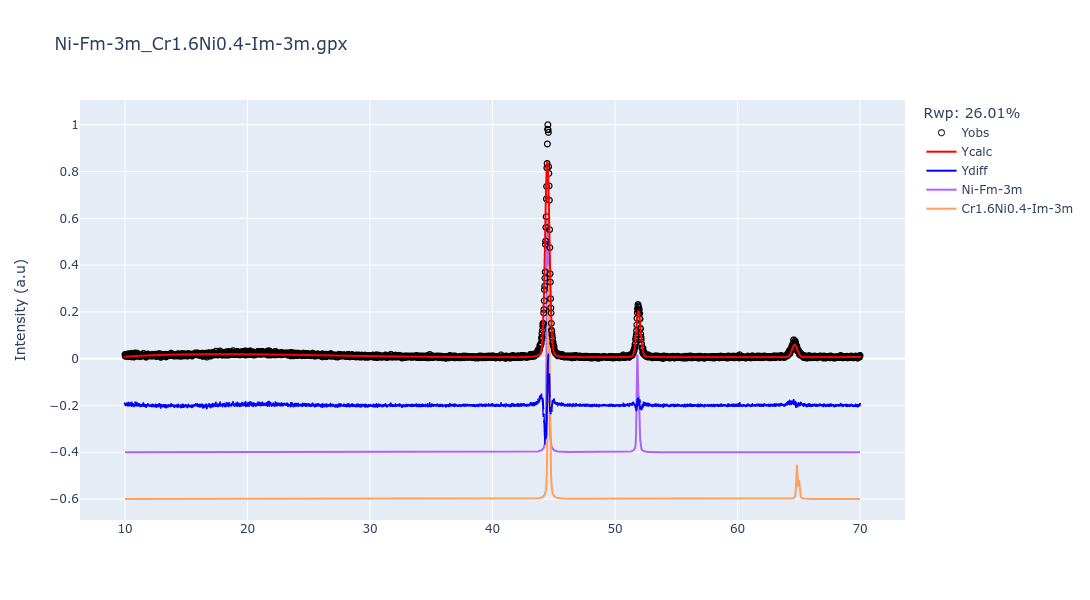

In [24]:
nicr.plot_result(0)

## HoB2.1

In [19]:
hob2 = XRay(name="HoB2",
            elements=["Ho","B"],
            working_folder="results/HoB2",
           exp_data_file="data/HoB21.ras")
hob2.analyze(n_runs=2)

No datafmt passed. Assuming its ras
Standarizing intensity to [0,1]..
Exported new datafile at results/HoB2/HoB21_preprocessed.csv
Using preprocessed data results/HoB2/HoB21_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Ho
Checking the following combination:B
Checking the following combination:Ho-B
Ho
B
Ho-B
Modified Query for given 2 to : ['Ho', 'B', 'Ho-B']
Simulating 31 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is HoB2, with Cij: 0.8338492857907771
HoB21_Top30.html
Sucessfuly read datafile results/HoB2/HoB21_preprocessed.csv
Refining 3 highest correlated patterns and determining main phase (n=0)...
Phase detected HoB2_MP_mp-2267.cif with rwp 29.477328987216968
Removing 0 patterns that maximum intensity dropped below 10%.
Phase detected HoB4_MP_mp-569281.cif
results/HoB2/HoB2All_N_Runs.html
0
520
0
520
Removed 1 repeated combinations.
Phase: HoB2-P6-mmm_Ho-Fm-3m, Rwp: 28.236310064506032
Phase: H

provider                     id           name  \
0  [MP, MP]   [mp-2267, mp-569281]   [HoB2, HoB4]   
1  [MP, MP]    [mp-2267, mp-10765]     [HoB2, Ho]   
2        MP                mp-2267           HoB2   
3  [MP, MP]  [mp-2267, mp-1104585]  [HoB2, HoB12]   
4  [MP, MP]    [mp-2267, mp-10659]     [HoB2, Ho]   
5        MP               mp-10765             Ho   
6        MP               mp-10659             Ho   

                                         filename        spacegroup  \
0    [HoB2_MP_mp-2267.cif, HoB4_MP_mp-569281.cif]  [P6/mmm, P4/mbm]   
1       [HoB2_MP_mp-2267.cif, Ho_MP_mp-10765.cif]   [P6/mmm, Fm-3m]   
2                             HoB2_MP_mp-2267.cif            P6/mmm   
3  [HoB2_MP_mp-2267.cif, HoB12_MP_mp-1104585.cif]   [P6/mmm, Fm-3m]   
4       [HoB2_MP_mp-2267.cif, Ho_MP_mp-10659.cif]    [P6/mmm, R-3m]   
5                              Ho_MP_mp-10765.cif             Fm-3m   
6                              Ho_MP_mp-10659.cif              R-3m   

  spacegroup_number           crystal_system   system_type  \
0        [191, 127]  [hexagonal, tetragonal]  [Ho-B, Ho-B]   
1        [191, 225]       [hexagonal, cubic]    [Ho-B, Ho]   
2               191                hexagonal          Ho-B   
3        [191, 225]       [hexagonal, cubic]  [Ho-B, Ho-B]   
4        [191, 166]    [hexagonal, trigonal]    [Ho-B, Ho]   
5               225                    cubic            Ho   
6               166                 trigonal            Ho   

                                           full_path        rwp  \
0  [results/HoB2/cifs/HoB2_MP_mp-2267.cif, result...  26.541874   
1  [results/HoB2/cifs/HoB2_MP_mp-2267.cif, result...  28.236310   
2              results/HoB2/cifs/HoB2_MP_mp-2267.cif  29.477329   
3  [results/HoB2/cifs/HoB2_MP_mp-2267.cif, result...  29.501067   
4  [results/HoB2/cifs/HoB2_MP_mp-2267.cif, result...  29.514970   
5               results/HoB2/cifs/Ho_MP_mp-10765.cif  66.996775   
6               results/HoB2/cifs/Ho_MP_mp-10659.cif  71.368675   

                   wt  nruns     pos  \
0  [0.89351, 0.10649]      2  [1, 2]   
1  [0.95549, 0.04451]      2  [1, 1]   
2                 100      1       1   
3  [0.98514, 0.01486]      2  [1, 2]   
4  [0.98807, 0.01193]      2  [1, 1]   
5                 100      1       1   
6                 100      1       1   

                                            gpx_path  
0  results/HoB2/gsas2_files/HoB2-P6-mmm_HoB4-P4-m...  
1  results/HoB2/gsas2_files/HoB2-P6-mmm_Ho-Fm-3m.gpx  
2           results/HoB2/gsas2_files/HoB2-P6-mmm.gpx  
3  results/HoB2/gsas2_files/HoB2-P6-mmm_HoB12-Fm-...  
4   results/HoB2/gsas2_files/HoB2-P6-mmm_Ho-R-3m.gpx  
5              results/HoB2/gsas2_files/Ho-Fm-3m.gpx  
6               results/HoB2/gsas2_files/Ho-R-3m.gpx

## LSCO

In [8]:
lsco = XRay(name="LSCO",
            elements=["La","Sr", "Cu", "O"],
            working_folder="results/LSCO",
           exp_data_file="data/La1.75Sr0.25CuO4.ras",
           max_oxy=4)
lsco.analyze(n_runs=2)

No datafmt passed. Assuming its ras
Sucessfuly connected to the database
Standarizing intensity to [0,1]..
Exported new datafile at results/LSCO/La1_preprocessed.csv
Using preprocessed data results/LSCO/La1_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:La
Checking the following combination:Sr
Checking the following combination:Cu
Checking the following combination:Sr-La
Checking the following combination:La-Cu
Checking the following combination:La-O
Checking the following combination:Sr-Cu
Checking the following combination:Sr-O
Checking the following combination:Cu-O
Checking the following combination:Sr-La-Cu
Checking the following combination:Sr-La-O
Checking the following combination:La-Cu-O
Checking the following combination:Sr-Cu-O
Checking the following combination:Sr-La-Cu-O
La
Sr
Cu
Sr-La
La-Cu
La-O
Sr-Cu
Sr-O
Cu-O
Sr-La-Cu
Sr-La-O
La-Cu-O
Sr-Cu-O
Sr-La-Cu-O
Modified Query for given 4 to : ['La', 'Sr', 'Cu', 'Sr-L

provider                  id                                     name  \
0    [COD, MP]  [1529795, mp-1968]               [Sr0.3La3.7Cu2O7.2, La2O3]   
1   [COD, COD]  [1529795, 2002286]               [Sr0.3La3.7Cu2O7.2, La2O3]   
2   [COD, COD]  [1529795, 1010278]               [Sr0.3La3.7Cu2O7.2, La2O3]   
3  [COD, OQMD]     [1529795, 3754]             [Sr0.3La3.7Cu2O7.2, La2CuO4]   
4   [COD, COD]  [1529795, 2002462]  [Sr0.3La3.7Cu2O7.2, Sr0.52La7.48Cu4O16]   
5          COD             1529795                        Sr0.3La3.7Cu2O7.2   
6          COD             2002462                       Sr0.52La7.48Cu4O16   
7         OQMD                3754                                  La2CuO4   

                                            filename          spacegroup  \
0  [Sr0.3La3.7Cu2O7.2_COD_1529795.cif, La2O3_MP_m...     [I4/mmm, P-3m1]   
1  [Sr0.3La3.7Cu2O7.2_COD_1529795.cif, La2O3_COD_...  [I4/mmm, P6_3/mmc]   
2  [Sr0.3La3.7Cu2O7.2_COD_1529795.cif, La2O3_COD_...      [I4/mmm, P321]   
3  [Sr0.3La3.7Cu2O7.2_COD_1529795.cif, La2CuO4_OQ...    [I4/mmm, I4/mmm]   
4  [Sr0.3La3.7Cu2O7.2_COD_1529795.cif, Sr0.52La7....      [I4/mmm, Cmce]   
5                  Sr0.3La3.7Cu2O7.2_COD_1529795.cif              I4/mmm   
6                 Sr0.52La7.48Cu4O16_COD_2002462.cif                Cmce   
7                              La2CuO4_OQMD_3754.cif              I4/mmm   

  spacegroup_number              crystal_system               system_type  \
0        [139, 164]      [tetragonal, trigonal]        [Sr-La-Cu-O, La-O]   
1        [139, 194]     [tetragonal, hexagonal]        [Sr-La-Cu-O, La-O]   
2        [139, 150]      [tetragonal, trigonal]        [Sr-La-Cu-O, La-O]   
3        [139, 139]    [tetragonal, tetragonal]     [Sr-La-Cu-O, La-Cu-O]   
4         [139, 64]  [tetragonal, orthorhombic]  [Sr-La-Cu-O, Sr-La-Cu-O]   
5               139                  tetragonal                Sr-La-Cu-O   
6                64                orthorhombic                Sr-La-Cu-O   
7               139                  tetragonal                   La-Cu-O   

                                           full_path        rwp  \
0  [results/LSCO/cifs/Sr0.3La3.7Cu2O7.2_COD_15297...  18.163756   
1  [results/LSCO/cifs/Sr0.3La3.7Cu2O7.2_COD_15297...  18.166180   
2  [results/LSCO/cifs/Sr0.3La3.7Cu2O7.2_COD_15297...  18.417830   
3  [results/LSCO/cifs/Sr0.3La3.7Cu2O7.2_COD_15297...  19.419511   
4  [results/LSCO/cifs/Sr0.3La3.7Cu2O7.2_COD_15297...  20.547519   
5  results/LSCO/cifs/Sr0.3La3.7Cu2O7.2_COD_152979...  21.855574   
6  results/LSCO/cifs/Sr0.52La7.48Cu4O16_COD_20024...  24.013360   
7            results/LSCO/cifs/La2CuO4_OQMD_3754.cif  34.065389   

                   wt  nruns     pos  \
0  [0.93304, 0.06696]      2  [1, 2]   
1  [0.93055, 0.06945]      2  [1, 2]   
2  [0.94055, 0.05945]      2  [1, 2]   
3  [0.90791, 0.09209]      2  [1, 1]   
4  [0.41689, 0.58311]      2  [1, 1]   
5                 100      1       1   
6                 100      1       1   
7                 100      1       1   

                                            gpx_path  
0  results/LSCO/gsas2_files/Sr0.3La3.7Cu2O7.2-I4-...  
1  results/LSCO/gsas2_files/Sr0.3La3.7Cu2O7.2-I4-...  
2  results/LSCO/gsas2_files/Sr0.3La3.7Cu2O7.2-I4-...  
3  results/LSCO/gsas2_files/Sr0.3La3.7Cu2O7.2-I4-...  
4  results/LSCO/gsas2_files/Sr0.3La3.7Cu2O7.2-I4-...  
5  results/LSCO/gsas2_files/Sr0.3La3.7Cu2O7.2-I4-...  
6  results/LSCO/gsas2_files/Sr0.52La7.48Cu4O16-Cm...  
7        results/LSCO/gsas2_files/La2CuO4-I4-mmm.gpx

## HoMoC$_{2}$

In [9]:
homoc2 = XRay(name="HoMoC2",
            elements=["Ho","Mo", "C"],
            working_folder="results/HoMoC2",
           exp_data_file="data/HoMoC2.ras")
homoc2.analyze(n_runs=3,)

No datafmt passed. Assuming its ras
Sucessfuly connected to the database
Standarizing intensity to [0,1]..
Exported new datafile at results/HoMoC2/HoMoC2_preprocessed.csv
Using preprocessed data results/HoMoC2/HoMoC2_preprocessed.csv. New datafmt is: csv
Sucessfuly connected to the database
Checking the following combination:Ho
Checking the following combination:Mo
Checking the following combination:C
Checking the following combination:Ho-Mo
Checking the following combination:Ho-C
Checking the following combination:Mo-C
Checking the following combination:Ho-Mo-C
Ho
Mo
C
Ho-Mo
Ho-C
Mo-C
Ho-Mo-C
Modified Query for given 2 to : ['Ho', 'Mo', 'C', 'Ho-Mo', 'Ho-C', 'Mo-C', 'Ho-Mo-C']
Simulating 105 patterns
Done. Cleaning up GSASII files.
Highest Correlated pattern is Mo8C4.08, with Cij: 0.7023444850847961
HoMoC2_Top30.html
Sucessfuly read datafile results/HoMoC2/HoMoC2_preprocessed.csv
Refining 3 highest correlated patterns and determining main phase (n=0)...
Phase detected Mo8C4.08_COD_152

provider                           id  \
0   [COD, OQMD, OQMD]       [1527881, 28872, 3668]   
1     [COD, OQMD, MP]   [1527881, 28872, mp-15177]   
2   [COD, OQMD, OQMD]     [1527881, 677963, 28872]   
3   [COD, OQMD, OQMD]      [1527881, 28887, 28872]   
4     [COD, OQMD, MP]     [1527881, 28872, mp-144]   
5         [COD, OQMD]             [1527881, 28872]   
6       [COD, MP, MP]  [1527881, mp-144, mp-15177]   
7     [COD, MP, OQMD]      [1527881, mp-144, 3668]   
8     [COD, OQMD, MP]   [1527881, 28887, mp-15177]   
9   [COD, OQMD, OQMD]       [1527881, 28887, 3668]   
10    [COD, OQMD, MP]     [1527881, 28887, mp-144]   
11     [COD, COD, MP]   [1527881, 1536525, mp-144]   
12    [COD, OQMD, MP]    [1527881, 677963, mp-144]   
13          [COD, MP]            [1527881, mp-144]   
14   [COD, COD, OQMD]    [1527881, 1536525, 28887]   
15         [COD, COD]           [1527881, 1536525]   
16        [COD, OQMD]             [1527881, 28887]   
17  [COD, OQMD, OQMD]     [1527881, 677963, 28887]   
18   [COD, COD, OQMD]   [1527881, 1536525, 677963]   
19        [COD, OQMD]            [1527881, 677963]   
20                COD                      1527881   
21                COD                      1536525   
22               OQMD                       677963   
23   [COD, COD, OQMD]    [1527881, 1536525, 28872]   

                               name  \
0          [Mo8C4.08, HoMoC2, HoC2]   
1         [Mo8C4.08, HoMoC2, Ho4C7]   
2          [Mo8C4.08, Mo2C, HoMoC2]   
3           [Mo8C4.08, MoC, HoMoC2]   
4            [Mo8C4.08, HoMoC2, Ho]   
5                [Mo8C4.08, HoMoC2]   
6             [Mo8C4.08, Ho, Ho4C7]   
7              [Mo8C4.08, Ho, HoC2]   
8            [Mo8C4.08, MoC, Ho4C7]   
9             [Mo8C4.08, MoC, HoC2]   
10              [Mo8C4.08, MoC, Ho]   
11      [Mo8C4.08, Mo7.72C3.84, Ho]   
12             [Mo8C4.08, Mo2C, Ho]   
13                   [Mo8C4.08, Ho]   
14     [Mo8C4.08, Mo7.72C3.84, MoC]   
15          [Mo8C4.08, Mo7.72C3.84]   
16                  [Mo8C4.08, MoC]   
17            [Mo8C4.08, Mo2C, MoC]   
18    [Mo8C4.08, Mo7.72C3.84, Mo2C]   
19                 [Mo8C4.08, Mo2C]   
20                         Mo8C4.08   
21                      Mo7.72C3.84   
22                             Mo2C   
23  [Mo8C4.08, Mo7.72C3.84, HoMoC2]   

                                             filename  \
0   [Mo8C4.08_COD_1527881.cif, HoMoC2_OQMD_28872.c...   
1   [Mo8C4.08_COD_1527881.cif, HoMoC2_OQMD_28872.c...   
2   [Mo8C4.08_COD_1527881.cif, Mo2C_OQMD_677963.ci...   
3   [Mo8C4.08_COD_1527881.cif, MoC_OQMD_28887.cif,...   
4   [Mo8C4.08_COD_1527881.cif, HoMoC2_OQMD_28872.c...   
5   [Mo8C4.08_COD_1527881.cif, HoMoC2_OQMD_28872.cif]   
6   [Mo8C4.08_COD_1527881.cif, Ho_MP_mp-144.cif, H...   
7   [Mo8C4.08_COD_1527881.cif, Ho_MP_mp-144.cif, H...   
8   [Mo8C4.08_COD_1527881.cif, MoC_OQMD_28887.cif,...   
9   [Mo8C4.08_COD_1527881.cif, MoC_OQMD_28887.cif,...   
10  [Mo8C4.08_COD_1527881.cif, MoC_OQMD_28887.cif,...   
11  [Mo8C4.08_COD_1527881.cif, Mo7.72C3.84_COD_153...   
12  [Mo8C4.08_COD_1527881.cif, Mo2C_OQMD_677963.ci...   
13       [Mo8C4.08_COD_1527881.cif, Ho_MP_mp-144.cif]   
14  [Mo8C4.08_COD_1527881.cif, Mo7.72C3.84_COD_153...   
15  [Mo8C4.08_COD_1527881.cif, Mo7.72C3.84_COD_153...   
16     [Mo8C4.08_COD_1527881.cif, MoC_OQMD_28887.cif]   
17  [Mo8C4.08_COD_1527881.cif, Mo2C_OQMD_677963.ci...   
18  [Mo8C4.08_COD_1527881.cif, Mo7.72C3.84_COD_153...   
19   [Mo8C4.08_COD_1527881.cif, Mo2C_OQMD_677963.cif]   
20                           Mo8C4.08_COD_1527881.cif   
21                        Mo7.72C3.84_COD_1536525.cif   
22                               Mo2C_OQMD_677963.cif   
23  [Mo8C4.08_COD_1527881.cif, Mo7.72C3.84_COD_153...   

                    spacegroup spacegroup_number  \
0         [Pbcn, Pnma, I4/mmm]     [60, 62, 139]   
1         [Pbcn, Pnma, P2_1/c]      [60, 62, 14]   
2          [Pbcn, P-31m, Pnma]     [60, 162, 62]   
3       [Pbcn, P6_3/mmc, Pnma]     [60, 194, 62]   
